In [1]:
import cirq
import matplotlib.pyplot as plt

In [2]:
# Create a circuit with 5 qubits
qubits = cirq.LineQubit.range(5)
circuit = cirq.Circuit()

In [3]:
# Apply Hadamard gates on every qubit
circuit.append(cirq.H(q) for q in qubits)

In [4]:
# Apply CNOT gates
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[1], qubits[2]))
circuit.append(cirq.CNOT(qubits[2], qubits[3]))
circuit.append(cirq.CNOT(qubits[3], qubits[4]))

In [5]:
# Apply SWAP gate between qubits 0 and 4
circuit.append(cirq.SWAP(qubits[0], qubits[4]))

In [6]:
# Rotate the first qubit by pi/2 around the X-axis
circuit.append(cirq.rx(0.5 * 3.14159265359).on(qubits[0]))

In [7]:
# Plot the circuit
print("Cirq Circuit:")
print(circuit)

Cirq Circuit:
0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×──────────────


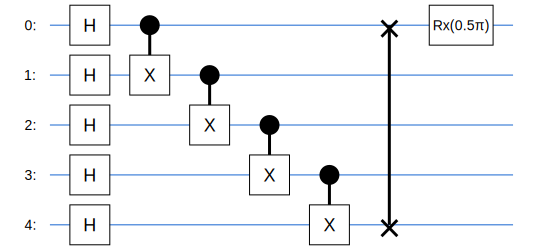

In [10]:
from cirq.contrib.svg import SVGCircuit
# Create a SVG representation of the circuit
svg = SVGCircuit(circuit)

# Display the SVG circuit diagram
display(svg)

In [27]:
import pennylane as qml
from pennylane import numpy as np

In [28]:
# Create a PennyLane quantum device with 4 wires (qubits)
dev = qml.device("default.qubit", wires=4)

In [29]:
# Create a quantum circuit
@qml.qnode(dev)
def second_quantum_circuit():
    # Apply a Hadamard gate to the first qubit
    qml.Hadamard(wires=0)

    # Rotate the second qubit by pi/3 around X
    qml.RX(2.0944, wires=1)  # 2.0944 radians is pi/3

    # Apply Hadamard gates to the third and fourth qubits
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)
    
    # Perform a swap test between the states of qubits 0, 1, and qubits 2, 3
    qml.SWAP(wires=[0, 1])
    qml.SWAP(wires=[2, 3])
    

    # Measure Pauli-Z expectation values for qubits 0 and 1
    expval_0 = qml.expval(qml.PauliZ(0))
    expval_1 = qml.expval(qml.PauliZ(1))

    return expval_0, expval_1



In [30]:
# Run the circuit
expval_0, expval_1 = second_quantum_circuit()

# Calculate the result by multiplying the expectation values
result = expval_0 * expval_1

# Print the circuit operations
print(second_quantum_circuit.qtape.operations)

# Print the result
print("Result of the second quantum circuit:", result)


[Hadamard(wires=[0]), RX(2.0944, wires=[1]), Hadamard(wires=[2]), Hadamard(wires=[3]), SWAP(wires=[0, 1]), SWAP(wires=[2, 3])]
Result of the second quantum circuit: -0.0
